<a href="https://colab.research.google.com/github/joshfpedro/math-328/blob/main/least_squares_approximation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def least_squares_polynomial(x_data, y_data, degree):
    """
    Fit polynomial using least squares.

    Parameters
    ----------
    x_data : array
        x-coordinates of data
    y_data : array
        y-coordinates of data
    degree : int
        Degree of polynomial to fit

    Returns
    -------
    coefficients : array
        Polynomial coefficients [a_0, a_1, ..., a_m]
    """
    # Build Vandermonde matrix
    A = np.vander(x_data, degree + 1, increasing=True)

    # Solve normal equations: A^T A a = A^T y
    coeffs = np.linalg.solve(A.T @ A, A.T @ y_data)

    return coeffs

# Generate noisy data
np.random.seed(42)
x_data = np.linspace(0, 10, 20)
y_true_data = 2 + 0.5 * x_data - 0.05 * x_data**2
y_noisy = y_true_data + np.random.normal(0, 1.0, len(x_data))

# Test it
coeffs = least_squares_polynomial(x_data, y_noisy, 3)
print(f"Fitted polynomial: y = {coeffs[0]:.3f} + {coeffs[1]:.3f}x + {coeffs[2]:.3f}x²")
print(f"True polynomial:   y = 2.000 + 0.500x - 0.050x²")

Fitted polynomial: y = 2.239 + 0.972x + -0.209x²
True polynomial:   y = 2.000 + 0.500x - 0.050x²


## Polynomial Regression

In [120]:
X.ravel()

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

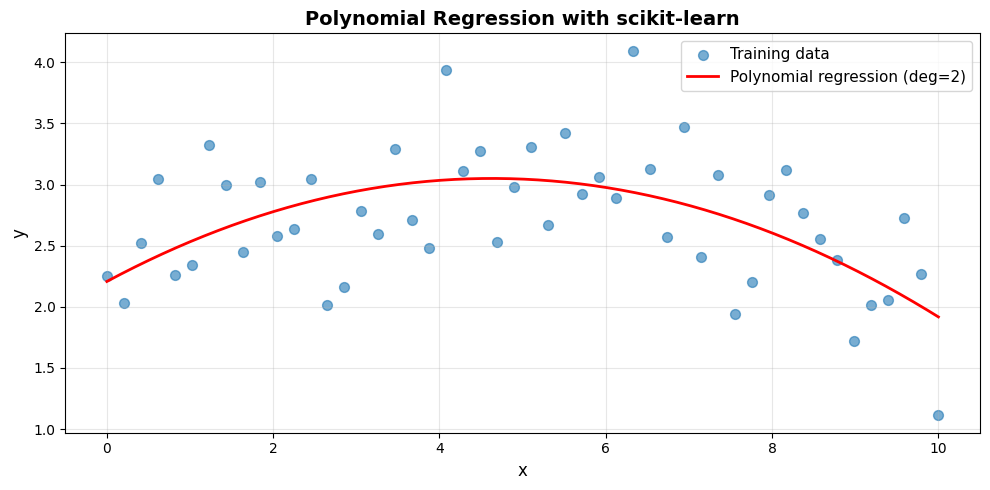

In [123]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Generate data
np.random.seed(42)
X = np.linspace(0, 10, 50).reshape(-1, 1)
y = 2 + 0.5 * X.ravel() - 0.05 * X.ravel()**2 + np.random.normal(0, 0.5, 50)

# Fit polynomial regression (degree 2)
model = make_pipeline(PolynomialFeatures(2), LinearRegression())
model.fit(X, y)

# Predict
X_test = np.linspace(0, 10, 300).reshape(-1, 1)
y_pred = model.predict(X_test)

plt.figure(figsize=(10, 5))
plt.scatter(X, y, alpha=0.6, s=50, label='Training data')
plt.plot(X_test, y_pred, 'r-', linewidth=2, label='Polynomial regression (deg=2)')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Polynomial Regression with scikit-learn', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()